# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Bima Indra Sakti
- Email: bima.indr2506@gmail.com
- Id Dicoding: bimaindr

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
 employee_df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv",
    encoding='windows-1252'
)
employee_df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [3]:
employee_df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [4]:
employee_df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
total_duplicates = employee_df.duplicated().sum()
print(total_duplicates)

0


In [6]:
employee_df['OverTime'].head(5)

0    Yes
1     No
2    Yes
3     No
4     No
Name: OverTime, dtype: object

In [7]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

## Data Preparation / Preprocessing

In [8]:
employee_df['Attrition'] = employee_df['Attrition'].fillna(0).astype(int)

In [9]:
ordinal_cols = [
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobLevel',
    'JobSatisfaction',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance'
]

employee_df[ordinal_cols] = employee_df[ordinal_cols].astype(int)


In [10]:
obj_cols = employee_df.select_dtypes(include='object').columns
employee_df[obj_cols] = employee_df[obj_cols].astype('category')

In [11]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeId                1470 non-null   int64   
 1   Age                       1470 non-null   int64   
 2   Attrition                 1470 non-null   int64   
 3   BusinessTravel            1470 non-null   category
 4   DailyRate                 1470 non-null   int64   
 5   Department                1470 non-null   category
 6   DistanceFromHome          1470 non-null   int64   
 7   Education                 1470 non-null   int64   
 8   EducationField            1470 non-null   category
 9   EmployeeCount             1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

In [12]:
main_df = employee_df.groupby("EmployeeId", as_index=False).agg({
    'Attrition': lambda x: x.mode()[0],
    'Age': 'mean',
    'Gender': lambda x: x.mode()[0],
    'MaritalStatus': lambda x: x.mode()[0],
    'DistanceFromHome': 'mean',
    'Department': lambda x: x.mode()[0],
    'JobRole': lambda x: x.mode()[0],
    'JobLevel': lambda x: x.mode()[0],
    'OverTime': lambda x: x.mode()[0],
    'TotalWorkingYears': 'mean',
    'YearsAtCompany': 'mean',
    'JobSatisfaction': 'mean',
    'WorkLifeBalance': 'mean',
    'MonthlyIncome': 'mean',
    'YearsSinceLastPromotion': 'mean'
})

main_df.head(5)

,EmployeeId,Attrition,Age,Gender,MaritalStatus,DistanceFromHome,Department,JobRole,JobLevel,OverTime,TotalWorkingYears,YearsAtCompany,JobSatisfaction,WorkLifeBalance,MonthlyIncome,YearsSinceLastPromotion
0,1,0,38.0,Male,Married,1.0,Human Resources,Human Resources,1,Yes,7.0,6.0,2.0,3.0,2991.0,1.0
1,2,1,37.0,Female,Married,11.0,Research & Development,Healthcare Representative,2,No,15.0,1.0,2.0,1.0,4777.0,0.0
2,3,1,51.0,Male,Married,4.0,Research & Development,Research Scientist,1,Yes,18.0,10.0,3.0,4.0,2461.0,2.0
3,4,0,42.0,Female,Married,26.0,Sales,Sales Executive,4,No,23.0,20.0,2.0,4.0,13525.0,4.0
4,5,0,40.0,Female,Married,2.0,Research & Development,Research Scientist,1,No,20.0,5.0,3.0,3.0,2001.0,0.0


In [13]:
main_df['IncomePerYearExp'] = (main_df['MonthlyIncome'] / (main_df['TotalWorkingYears'] + 1))
main_df['LoyaltyRatio'] = (main_df['YearsAtCompany'] / (main_df['TotalWorkingYears'] + 1))
main_df['PromotionLag'] = (main_df['YearsAtCompany'] - main_df['YearsSinceLastPromotion'])
main_df['OverTimeBinary'] = (main_df['OverTime'] == 'Yes').astype(int)

main_df.head(5)

,EmployeeId,Attrition,Age,Gender,MaritalStatus,DistanceFromHome,Department,JobRole,JobLevel,OverTime,TotalWorkingYears,YearsAtCompany,JobSatisfaction,WorkLifeBalance,MonthlyIncome,YearsSinceLastPromotion,IncomePerYearExp,LoyaltyRatio,PromotionLag,OverTimeBinary
0,1,0,38.0,Male,Married,1.0,Human Resources,Human Resources,1,Yes,7.0,6.0,2.0,3.0,2991.0,1.0,373.875000,0.750000,5.0,1
1,2,1,37.0,Female,Married,11.0,Research & Development,Healthcare Representative,2,No,15.0,1.0,2.0,1.0,4777.0,0.0,298.562500,0.062500,1.0,0
2,3,1,51.0,Male,Married,4.0,Research & Development,Research Scientist,1,Yes,18.0,10.0,3.0,4.0,2461.0,2.0,129.526316,0.526316,8.0,1
3,4,0,42.0,Female,Married,26.0,Sales,Sales Executive,4,No,23.0,20.0,2.0,4.0,13525.0,4.0,563.541667,0.833333,16.0,0
4,5,0,40.0,Female,Married,2.0,Research & Development,Research Scientist,1,No,20.0,5.0,3.0,3.0,2001.0,0.0,95.285714,0.238095,5.0,0


In [14]:
main_df.columns = ['employee_id',
                  'attrition',
                  'age',
                  'gender',
                  'marital_status',
                  'distance_from_home',
                  'department',
                  'job_role',
                  'job_level',
                  'over_time',
                  'total_working_years',
                  'years_at_company',
                  'job_satisfaction',
                  'work_life_balance',
                  'monthly_income',
                  'years_since_last_promotion'
                  'years_at_company',
                  'income_per_year_exp',
                  'loyal_ratio',
                  'promotion_lag',
                  'over_time_binary']

main_df.head(5)

,employee_id,attrition,age,gender,marital_status,distance_from_home,department,job_role,job_level,over_time,total_working_years,years_at_company,job_satisfaction,work_life_balance,monthly_income,years_since_last_promotionyears_at_company,income_per_year_exp,loyal_ratio,promotion_lag,over_time_binary
0,1,0,38.0,Male,Married,1.0,Human Resources,Human Resources,1,Yes,7.0,6.0,2.0,3.0,2991.0,1.0,373.875000,0.750000,5.0,1
1,2,1,37.0,Female,Married,11.0,Research & Development,Healthcare Representative,2,No,15.0,1.0,2.0,1.0,4777.0,0.0,298.562500,0.062500,1.0,0
2,3,1,51.0,Male,Married,4.0,Research & Development,Research Scientist,1,Yes,18.0,10.0,3.0,4.0,2461.0,2.0,129.526316,0.526316,8.0,1
3,4,0,42.0,Female,Married,26.0,Sales,Sales Executive,4,No,23.0,20.0,2.0,4.0,13525.0,4.0,563.541667,0.833333,16.0,0
4,5,0,40.0,Female,Married,2.0,Research & Development,Research Scientist,1,No,20.0,5.0,3.0,3.0,2001.0,0.0,95.285714,0.238095,5.0,0


## Modeling

In [15]:
y = main_df['attrition']
X = main_df.drop(columns=['employee_id', 'attrition'])

In [16]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

print("Numerical:", num_cols)
print("Categorical:", cat_cols)


Numerical: Index(['age', 'distance_from_home', 'job_level', 'total_working_years',
       'years_at_company', 'job_satisfaction', 'work_life_balance',
       'monthly_income', 'years_since_last_promotionyears_at_company',
       'income_per_year_exp', 'loyal_ratio', 'promotion_lag',
       'over_time_binary'],
      dtype='object')
Categorical: Index(['gender', 'marital_status', 'department', 'job_role', 'over_time'], dtype='object')


In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ])


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logreg_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

logreg_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'distance_from_home', 'job_level', 'total_working_years',
       'years_at_company', 'job_satisfaction', 'work_life_balance',
       'monthly_income', 'years_since_last_promotionyears_at_company',
       'income_per_year_exp', 'loyal_ratio', 'promotion_lag',
       'over_time_binary'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['gender', 'marital_status', 'department', 'job_role', 'over_time'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'distance_from_home', 'job_level', 'total_working_years',
       'years_at_company', 'job_satisfaction', 'work_life_balance',
       'monthly_income', 'years_since_last_promotionyears_at_company',
       'income_per_year_exp', 'loyal_ratio', 'promotion_lag',
       'over_time_binary'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['gender', 'marital_status', 'department', 'job_role', 'over_time'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=5, n_estimators=300,
                                        random_state=42))])

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

gb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'distance_from_home', 'job_level', 'total_working_years',
       'years_at_company', 'job_satisfaction', 'work_life_balance',
       'monthly_income', 'years_since_last_promotionyears_at_company',
       'income_per_year_exp', 'loyal_ratio', 'promotion_lag',
       'over_time_binary'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['gender', 'marital_status', 'department', 'job_role', 'over_time'], dtype='object'))])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=200,
                                            random_state=42))])

In [22]:
y_prob = logreg_model.predict_proba(X_test)[:, 1]

best_threshold = 0.3
y_pred = (y_prob >= best_threshold).astype(int)

## Evaluation

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = logreg_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[256   2]
 [ 31   5]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       258
           1       0.71      0.14      0.23        36

    accuracy                           0.89       294
   macro avg       0.80      0.57      0.59       294
weighted avg       0.87      0.89      0.85       294



In [24]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[242  16]
 [ 24  12]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       258
           1       0.43      0.33      0.38        36

    accuracy                           0.86       294
   macro avg       0.67      0.64      0.65       294
weighted avg       0.85      0.86      0.86       294



In [25]:
y_pred = gb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[252   6]
 [ 31   5]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       258
           1       0.45      0.14      0.21        36

    accuracy                           0.87       294
   macro avg       0.67      0.56      0.57       294
weighted avg       0.84      0.87      0.84       294



In [26]:
models = {
    'Logistic Regression': logreg_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Logistic Regression
[[256   2]
 [ 31   5]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       258
           1       0.71      0.14      0.23        36

    accuracy                           0.89       294
   macro avg       0.80      0.57      0.59       294
weighted avg       0.87      0.89      0.85       294


Random Forest
[[242  16]
 [ 24  12]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       258
           1       0.43      0.33      0.38        36

    accuracy                           0.86       294
   macro avg       0.67      0.64      0.65       294
weighted avg       0.85      0.86      0.86       294


Gradient Boosting
[[252   6]
 [ 31   5]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       258
           1       0.45      0.14      0.21        36

    accuracy                           0.87       294
   m

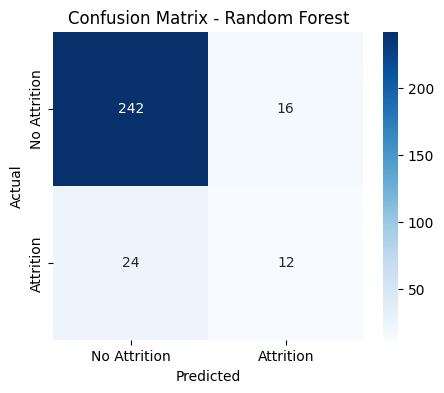

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['No Attrition', 'Attrition'],
    yticklabels=['No Attrition', 'Attrition']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


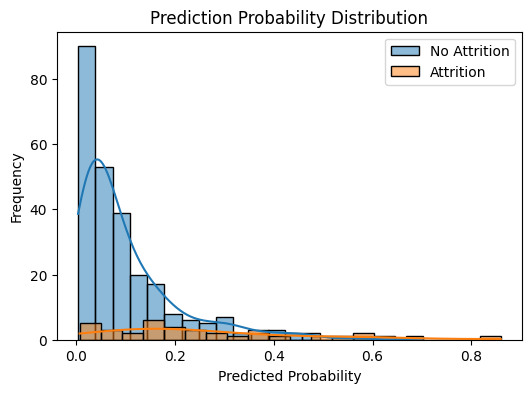

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(y_prob[y_test==0], bins=20, kde=True, label='No Attrition')
sns.histplot(y_prob[y_test==1], bins=20, kde=True, label='Attrition')

plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Prediction Probability Distribution")
plt.legend()
plt.show()

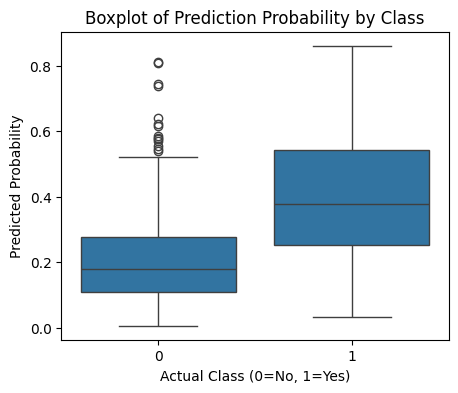

In [29]:
import pandas as pd
y_prob = rf_model.predict_proba(X_test)[:, 1]
eval_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Prob': y_prob
})

plt.figure(figsize=(5,4))
sns.boxplot(x='Actual', y='Predicted_Prob', data=eval_df)
plt.xlabel("Actual Class (0=No, 1=Yes)")
plt.ylabel("Predicted Probability")
plt.title("Boxplot of Prediction Probability by Class")
plt.show()

C:\Users\Bima Indra\AppData\Local\Temp\ipykernel_15572\650375009.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


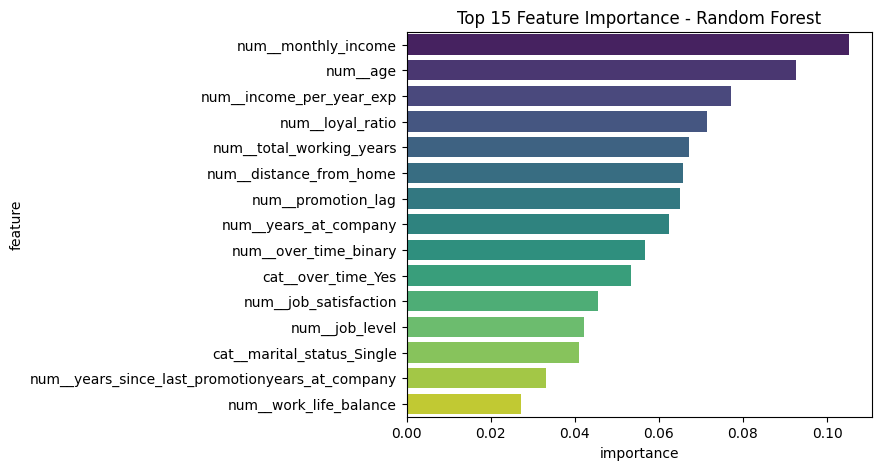

In [30]:
import numpy as np

feature_names = rf_model.named_steps['preprocess']\
    .get_feature_names_out()

importances = rf_model.named_steps['model'].feature_importances_

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(15)

plt.figure(figsize=(6,5))
sns.barplot(
    x='importance',
    y='feature',
    data=feat_imp,
    palette='viridis'
)
plt.title("Top 15 Feature Importance - Random Forest")
plt.show()

In [31]:
import pandas as pd

plot_df = pd.DataFrame({
    "Actual": y_test,
    "Probability": y_prob
})

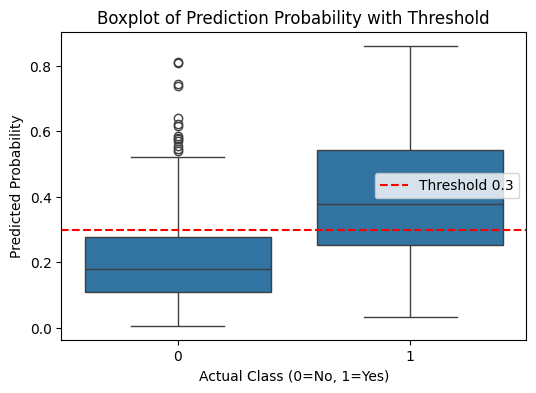

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

sns.boxplot(
    x="Actual",
    y="Probability",
    data=plot_df
)

plt.axhline(
    0.3,
    color='red',
    linestyle='--',
    label='Threshold 0.3'
)

plt.xlabel("Actual Class (0=No, 1=Yes)")
plt.ylabel("Predicted Probability")
plt.title("Boxplot of Prediction Probability with Threshold")
plt.legend()
plt.show()


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[242  16]
 [ 24  12]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       258
           1       0.43      0.33      0.38        36

    accuracy                           0.86       294
   macro avg       0.67      0.64      0.65       294
weighted avg       0.85      0.86      0.86       294



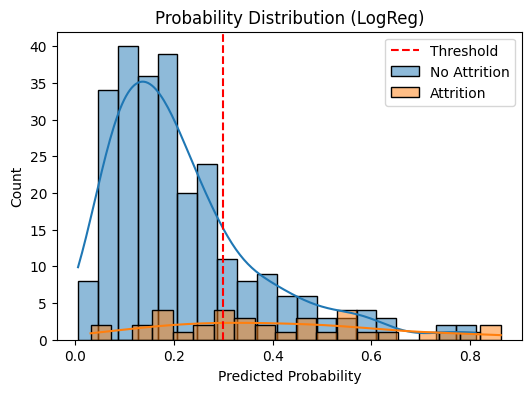

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(y_prob[y_test==0], bins=20, kde=True, label='No Attrition')
sns.histplot(y_prob[y_test==1], bins=20, kde=True, label='Attrition')
plt.axvline(best_threshold, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.xlabel("Predicted Probability")
plt.title("Probability Distribution (LogReg)")
plt.show()


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg_balanced = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ))
])

logreg_balanced.fit(X_train, y_train)

# Predict probability
y_prob_bal = logreg_balanced.predict_proba(X_test)[:, 1]

# pakai threshold default dulu
y_pred_bal = (y_prob_bal >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))


[[188  70]
 [ 11  25]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       258
           1       0.26      0.69      0.38        36

    accuracy                           0.72       294
   macro avg       0.60      0.71      0.60       294
weighted avg       0.86      0.72      0.77       294



In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[253   5]
 [ 33   3]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       258
           1       0.38      0.08      0.14        36

    accuracy                           0.87       294
   macro avg       0.63      0.53      0.53       294
weighted avg       0.82      0.87      0.83       294



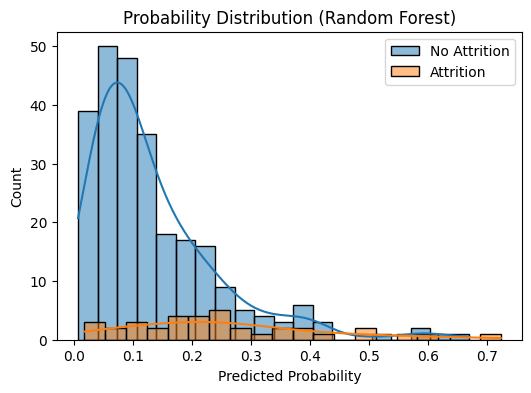

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(y_prob_rf[y_test==0], bins=20, kde=True, label='No Attrition')
sns.histplot(y_prob_rf[y_test==1], bins=20, kde=True, label='Attrition')
plt.xlabel("Predicted Probability")
plt.legend()
plt.title("Probability Distribution (Random Forest)")
plt.show()


In [38]:
feature_names = (
    rf_model.named_steps['preprocess']
    .get_feature_names_out()
)

importances = rf_model.named_steps['classifier'].feature_importances_

fi_df = (
    pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    .sort_values(by='importance', ascending=False)
    .head(10)
)

fi_df

,feature,importance
7,num__monthly_income,0.111105
0,num__age,0.095841
9,num__income_per_year_exp,0.079971
1,num__distance_from_home,0.071616
10,num__loyal_ratio,0.070739
3,num__total_working_years,0.066052
11,num__promotion_lag,0.064139
4,num__years_at_company,0.061452
5,num__job_satisfaction,0.047344
12,num__over_time_binary,0.045882


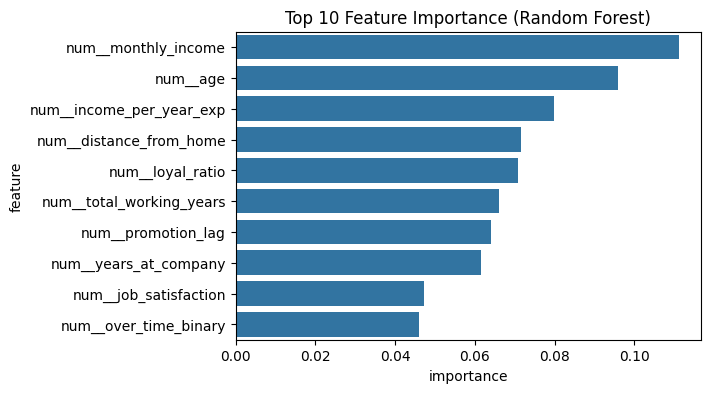

In [39]:
plt.figure(figsize=(6,4))
sns.barplot(data=fi_df, x='importance', y='feature')
plt.title("Top 10 Feature Importance (Random Forest)")
plt.show()

In [40]:
joblib.dump(logreg_model, "attrition_model.joblib")

['attrition_model.joblib']

In [41]:
main_df.to_csv("employee_attrition_ready.csv", index=False)

## Rekomendasi Action Items untuk Departemen HR
Berdasarkan hasil pelatihan model machine learning dan analisis feature importance, diperoleh beberapa faktor utama yang memengaruhi tingkat attrition karyawan. Oleh karena itu, perusahaan dapat menerapkan action items berikut:


### 1. Optimalisasi Skema Kompensasi
Fitur `num_monthly_income` dan `num_income_per_year_exp` memiliki pengaruh besar terhadap attrition.
- Lakukan benchmarking gaji secara berkala.
- Prioritaskan penyesuaian gaji untuk karyawan berpengalaman namun berpenghasilan relatif rendah.

### 2. Program Retensi Karyawan Loyal
Fitur `num_loyal_ratio` dan `num_years_at_company` menunjukkan bahwa karyawan lama tetap berpotensi resign.
- Terapkan program loyalitas berbasis masa kerja.
- Berikan insentif jangka panjang seperti stock option atau bonus tahunan.

### 3. Percepatan Jalur Promosi
Nilai `num_promotion_lag` yang tinggi berkorelasi dengan attrition.
- Buat jalur karier yang lebih transparan.
- Evaluasi karyawan yang belum dipromosikan dalam waktu lama.

### 4. Manajemen Beban Kerja & Lembur
Fitur `num_over_timeBinary` berkontribusi terhadap risiko attrition.
- Batasi lembur berlebih.
- Terapkan kebijakan work-life balance yang lebih fleksibel.